# Skopje Air Pollution

## Introduction

The city of Skopje is well known for its struggles with poor air quality, especially in the winter months. The main pollutants are CO, NO2, ozone, and particulate matter of different dimensions.

Monitoring stations for measuring the concentrations of each of the main pollutants have been installed in different locations around the city.

## Import Libraries
Before we begin, let us import the libraries that we will be using (Pandas, matplotlib and seaborn). Any additional libraries that we decide to import we will add in this cell.

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## The Dataset
The following data has been taken from kaggle (https://www.kaggle.com/datasets/cokastefan/pm10-pollution-data-in-skopje-from-2008-to-2018) where data from the monitoring stations (https://air.moepp.gov.mk/?page_id=175) for the period from Janaury 2007 to December 2018 has been compiled in a single dataset. To make our task more managable, we will only be looking at data for the time period of five years, from January 2012 to December 2016.

## Import data
The data is contained in the directory CSVs in the files (CO.csv, NO2.csv, O3.csv, PM10.csv, and PM25.csv). Let's import the data from the CSV files as separate pandas dataframes.

In [3]:
# Read files into dataframes

CO_df = pd.read_csv('CSVs/CO.csv')
NO2_df = pd.read_csv('CSVs/NO2.csv')
O3_df = pd.read_csv('CSVs/O3.csv')
PM10_df = pd.read_csv('CSVs/PM10.csv')
PM25_df = pd.read_csv('CSVs/PM25.csv')

## Review Data
Let's display each of the dataframes and look at the data types in order to get a sense of the data. Check that the data types are accurate.

In [12]:
# Display dataframes and check data types

CO_df.info()
CO_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  45307 non-null  int64  
 1   Unnamed: 0    45307 non-null  int64  
 2   Centar        28020 non-null  float64
 3   GaziBaba      36042 non-null  float64
 4   Karpos        40426 non-null  float64
 5   Lisice        35184 non-null  float64
 6   Miladinovci   23316 non-null  float64
 7   Mobile        0 non-null      float64
 8   Rektorat      23816 non-null  float64
 9   time          45307 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 3.5+ MB


,Unnamed: 0.1,Unnamed: 0,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Mobile,Rektorat,time
0,36212,36212,0.2876,0.9219,0.5644,NaN,NaN,NaN,0.3708,2012-01-01 00:00:00
1,36213,36213,0.1538,1.2029,0.8275,NaN,0.3858,NaN,0.4097,2012-01-01 01:00:00
2,36214,36214,0.1600,1.3198,0.7423,NaN,0.3346,NaN,0.4061,2012-01-01 02:00:00
3,36215,36215,0.1699,1.1449,0.4445,NaN,0.3549,NaN,0.6500,2012-01-01 03:00:00
4,36216,36216,0.1539,0.8092,0.5121,NaN,0.2553,NaN,0.7198,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
45302,81514,81514,NaN,1.3572,0.5898,0.3828,0.5220,NaN,0.4292,2016-12-31 19:00:00
45303,81515,81515,NaN,0.9164,0.8474,2.2388,0.4060,NaN,1.8676,2016-12-31 20:00:00
45304,81516,81516,NaN,1.7400,1.3342,2.4592,0.4060,NaN,1.7632,2016-12-31 21:00:00
45305,81517,81517,NaN,3.0392,0.9611,4.4660,0.4872,NaN,2.5056,2016-12-31 22:00:00


In [34]:
NO2_df.info()
NO2_df

In [37]:
O3_df.info()
O3_df

In [ ]:
PM10_df.info()
PM10_df

In [42]:
PM25_df.info()
PM25_df

## Data cleaning and restructuring
Because the mobile column is from a mobile monitoring station located in the municipality of Butel and occasionally displaced, we can drop that column.

We can also rename the column time to datetime and create additional separate time and date columns. 

We can add a column in each of the dataframes indicating the type of pollutant and concatenate the dataframes.

In [4]:
# Data cleaning and restructuring

# Deleting the Mobile columns
del CO_df['Mobile'], NO2_df['Mobile'], O3_df['Mobile'], PM10_df['Mobile'], PM25_df['Mobile']

# Deleting the Unnammed columns because we are not using them anywhere.
del CO_df['Unnamed: 0.1'], NO2_df['Unnamed: 0.1'], O3_df['Unnamed: 0.1'], PM10_df['Unnamed: 0.1'], PM25_df['Unnamed: 0.1']
del CO_df['Unnamed: 0'], NO2_df['Unnamed: 0'], O3_df['Unnamed: 0'], PM10_df['Unnamed: 0'], PM25_df['Unnamed: 0']


In [5]:
# CONVERTING TO DATETIME AND RENAMING THE COLUMNS
CO_df['datetime'] = pd.to_datetime(CO_df['time'])
NO2_df['datetime'] = pd.to_datetime(NO2_df['time'])
O3_df['datetime'] = pd.to_datetime(O3_df['time'])
PM10_df['datetime'] = pd.to_datetime(PM10_df['time'])
PM25_df['datetime'] = pd.to_datetime(PM25_df['time'])

# DELETING THE OLD TIME COLUMNS
del CO_df['time'], NO2_df['time'], O3_df['time'], PM10_df['time'], PM25_df['time']

# CREATING THE NEW TIME COLUMNS WHICH WILL CONSIST OF ONLY THE TIME
CO_df['time'] = CO_df['datetime'].dt.time
NO2_df['time'] = NO2_df['datetime'].dt.time
O3_df['time'] = O3_df['datetime'].dt.time
PM10_df['time'] = PM10_df['datetime'].dt.time
PM25_df['time'] = PM25_df['datetime'].dt.time

# CREATING THE DATE COLUMNS
CO_df['date'] = CO_df['datetime'].dt.date
NO2_df['date'] = NO2_df['datetime'].dt.date
O3_df['date'] = O3_df['datetime'].dt.date
PM10_df['date'] = PM10_df['datetime'].dt.date
PM25_df['date'] = PM25_df['datetime'].dt.date


In [6]:
# Adding a pollutant type columns
CO_df['pollutant_type'] = 'CO'
NO2_df['pollutant_type'] = 'NO2'
O3_df['pollutant_type'] = 'O3'
PM10_df['pollutant_type'] = 'PM10'
PM25_df['pollutant_type'] = 'PM25'

In [7]:
# Concatonating the dataframes into a one big dataframe.

df = pd.DataFrame()
files = [CO_df, NO2_df, O3_df, PM10_df, PM25_df]

for temp_df in files:
    df = pd.concat([df, temp_df])

df

,Centar,GaziBaba,Karpos,Lisice,Miladinovci,Rektorat,datetime,time,date,pollutant_type
0,0.2876,0.9219,0.5644,NaN,NaN,0.3708,2012-01-01 00:00:00,00:00:00,2012-01-01,CO
1,0.1538,1.2029,0.8275,NaN,0.3858,0.4097,2012-01-01 01:00:00,01:00:00,2012-01-01,CO
2,0.1600,1.3198,0.7423,NaN,0.3346,0.4061,2012-01-01 02:00:00,02:00:00,2012-01-01,CO
3,0.1699,1.1449,0.4445,NaN,0.3549,0.6500,2012-01-01 03:00:00,03:00:00,2012-01-01,CO
4,0.1539,0.8092,0.5121,NaN,0.2553,0.7198,2012-01-01 04:00:00,04:00:00,2012-01-01,CO
...,...,...,...,...,...,...,...,...,...,...
45302,NaN,NaN,56.7961,NaN,NaN,NaN,2016-12-31 19:00:00,19:00:00,2016-12-31,PM25
45303,NaN,NaN,80.1820,NaN,NaN,NaN,2016-12-31 20:00:00,20:00:00,2016-12-31,PM25
45304,NaN,NaN,96.3556,NaN,NaN,NaN,2016-12-31 21:00:00,21:00:00,2016-12-31,PM25
45305,NaN,NaN,70.3649,NaN,NaN,NaN,2016-12-31 22:00:00,22:00:00,2016-12-31,PM25


In [8]:
df.drop_duplicates(inplace=True)

# Question 1
What location in Skopje has the highest average pollution for each of the pollutants? .......... (2 points)

Lisice is the location with the highest average pollution for CO with a value of 1.43


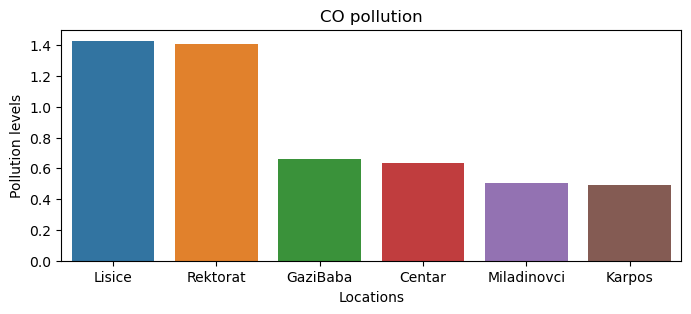

Rektorat is the location with the highest average pollution for NO2 with a value of 32.61


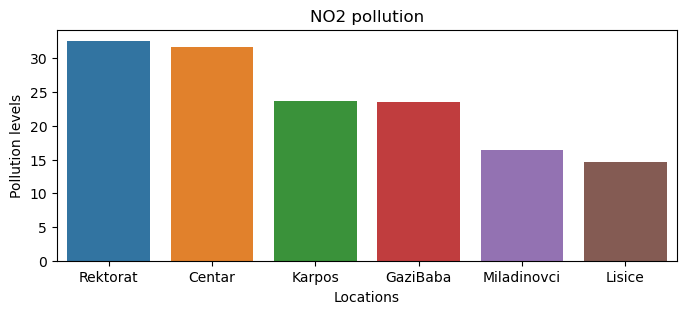

Miladinovci is the location with the highest average pollution for O3 with a value of 44.65


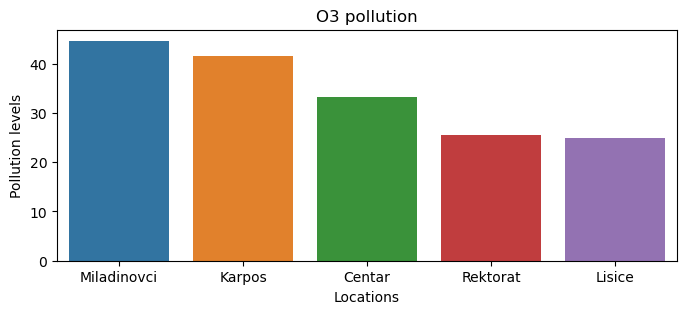

Lisice is the location with the highest average pollution for PM10 with a value of 91.34


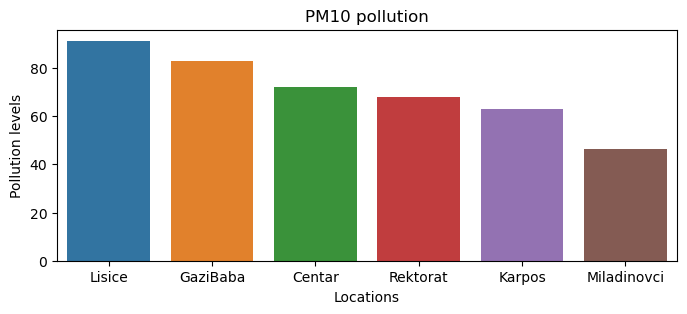

Karpos is the location with the highest average pollution for PM25 with a value of 46.52


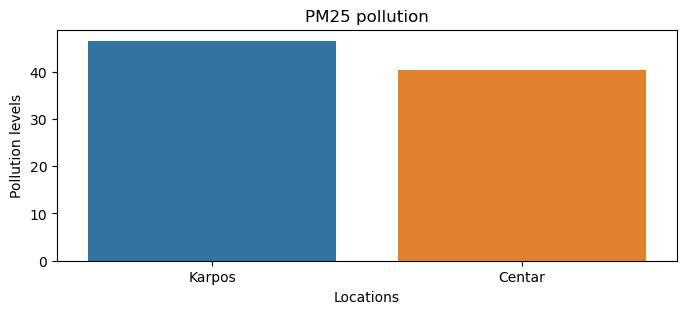

In [10]:
# Solution

# FUNCTION FOR VISUELIZATION
def plot_bar(inputDF, indexName, valuesName, title):

    data_to_plot = pd.DataFrame()

    data_to_plot[indexName] = inputDF.index
    data_to_plot[valuesName] = inputDF.values

    fig = plt.figure(figsize=(8, 3))
    
    sns.barplot(data=data_to_plot, x=indexName, y=valuesName)
    plt.title(title)
    plt.show()


pollutant_types = ['CO', 'NO2', 'O3', 'PM10', 'PM25']


for pollutant in pollutant_types:

    # filtriranje
    temp_df = df.groupby('pollutant_type').mean().transpose().sort_values(by=pollutant, ascending=False)[pollutant].dropna()
    location = temp_df.index[0]
    value = temp_df.values[0]
    print(f'{location} is the location with the highest average pollution for {pollutant} with a value of {round(value,2)}')

    # vizuelizacija
    plot_bar(temp_df, 'Locations' , 'Pollution levels', f'{pollutant} pollution')





# Question 2
For every year, for each of the pollutants, on what time stamp is the maximum pollution for every location? What time of the year seems to have the most pollution in Skopje? .......... (2 points)

In [11]:
# Solution:

q2_df = pd.DataFrame()

# LISTI SO UNIQUE VREDNOSTI ZA YEARS, POLLUTANTS I LOCATIONS
years = [ year for year in df['datetime'].dt.year.unique() ]
pollutants = [ pollutant for pollutant in df['pollutant_type'].unique() ]
locations = [ location for location in df.columns[:6] ]


# 3 LOOPS
for year in years:
    for location in locations:

        # OVIE LISTI GI PRAVAM POSTO KE MI SLUZAT DA NAPRAVAM MINI DATAFRAMES STO POKASNO KE GI CASTIRAM VO EDEN GOLEM DATAFRAME
        datetime_list, pollutant_list, values_list = list(), list(), list()

        for pollutant in pollutants:
            
            # GI VADAM VREDNOSTITE KADE SHTO IMA NAJGOLEMA ZAGADENOST ZA ODREDENA LOKACIJA, GODINA I TIP NA ZAGADUVAC 
            temporary_df = df[(df['datetime'].dt.year == year) & (df['pollutant_type'] == pollutant)][[location, 'datetime', 'pollutant_type']]
            temporary_df.sort_values(by=location, ascending=False, inplace=True)
            temporary_df = temporary_df.iloc[0]

            # GI STORIRAM VO LISTITE SO KOJ STO KE NAPRAVAM MINI DATAFRAMES
            datetime_list.append(temporary_df['datetime'])
            pollutant_list.append(temporary_df['pollutant_type'])
            values_list.append(temporary_df.values[0])
        
        # PRAVAM ISTO TAKA LISTI ZA MINI DATAFRAMETO, OVDE VREDNOSTITE SE SITE ISTI
        # SAMO BITEN E BROJOT NA VREDNOSTI DA E ISTO KAKO VO TIE LISTI GORE
        year_list = [ year for x in values_list ]
        location_list = [ location for x in  values_list ]
        
        # OVA NEW_ROWS E USTVARA MINIDATAFRAME
        new_rows = {'Year' : year_list, 'Location' : location_list, 'Pollutant' : pollutant_list, 'Pollution Levels' : values_list , 'Datetime' : datetime_list}
        new_df = pd.DataFrame(new_rows)

        # OVA E FINAL DATAFRAME SOSTAVENA OD SITE MINI DATAFRAMES
        q2_df = pd.concat([q2_df,new_df])

# RESETIRAM INDEX I GI BRISAM STARITE INDEXI
q2_df.reset_index(inplace=True)
del q2_df['index']

# ANSWER
q2_df

,Year,Location,Pollutant,Pollution Levels,Datetime
0,2012,Centar,CO,7.7866,2012-12-26 22:00:00
1,2012,Centar,NO2,327.1276,2012-01-05 11:00:00
2,2012,Centar,O3,289.8620,2012-10-03 19:00:00
3,2012,Centar,PM10,878.6840,2012-12-27 03:00:00
4,2012,Centar,PM25,680.7400,2012-07-12 21:00:00
...,...,...,...,...,...
145,2016,Rektorat,CO,17.0288,2016-12-20 19:00:00
146,2016,Rektorat,NO2,170.0567,2016-12-12 10:00:00
147,2016,Rektorat,O3,134.0738,2016-08-16 17:00:00
148,2016,Rektorat,PM10,981.3100,2016-12-20 19:00:00


In [12]:
# What time of the year seems to have the most pollution in Skopje?

locations_list = [ loc for loc in q2_df['Location'].unique() ]
pollutant_list = [ pollutant for pollutant in q2_df['Pollutant'].unique() ]
q2B_df = pd.DataFrame()

for loc in locations_list:
    for pol in pollutant_list:
        temp_df = q2_df[(q2_df['Location'] == loc) & (q2_df['Pollutant'] == pol)].sort_values(by='Pollution Levels',ascending=False).head(1)
        q2B_df = pd.concat([q2B_df,temp_df])

q2B_df.reset_index(inplace=True)
del q2B_df['index'], q2B_df['Year']

q2B_df

,Location,Pollutant,Pollution Levels,Datetime
0,Centar,CO,10.9701,2013-12-22 00:00:00
1,Centar,NO2,327.1276,2012-01-05 11:00:00
2,Centar,O3,289.8620,2012-10-03 19:00:00
3,Centar,PM10,1093.0800,2013-12-22 01:00:00
4,Centar,PM25,680.7400,2012-07-12 21:00:00
5,GaziBaba,CO,13.6416,2015-11-08 06:00:00
6,GaziBaba,NO2,373.2140,2013-12-22 15:00:00
7,GaziBaba,O3,NaN,2012-01-01 00:00:00
8,GaziBaba,PM10,996.7580,2012-02-15 03:00:00
9,GaziBaba,PM25,NaN,2012-01-01 00:00:00


# Question 3
In what month of the year is the average polution accross locations highest for each of the pollutants? .......... (2 points)

In Centar the highest CO polltuion on average happens in December with a value of 1.82
In Centar the highest NO2 polltuion on average happens in December with a value of 44.37
In Centar the highest O3 polltuion on average happens in July with a value of 69.47
In Centar the highest PM10 polltuion on average happens in December with a value of 176.52
In Centar the highest PM25 polltuion on average happens in December with a value of 95.27


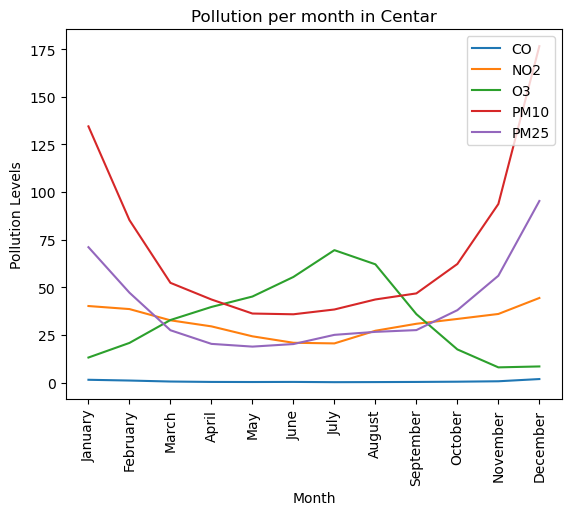





In GaziBaba the highest CO polltuion on average happens in December with a value of 1.93
In GaziBaba the highest NO2 polltuion on average happens in December with a value of 46.3
In GaziBaba the highest PM10 polltuion on average happens in December with a value of 180.56


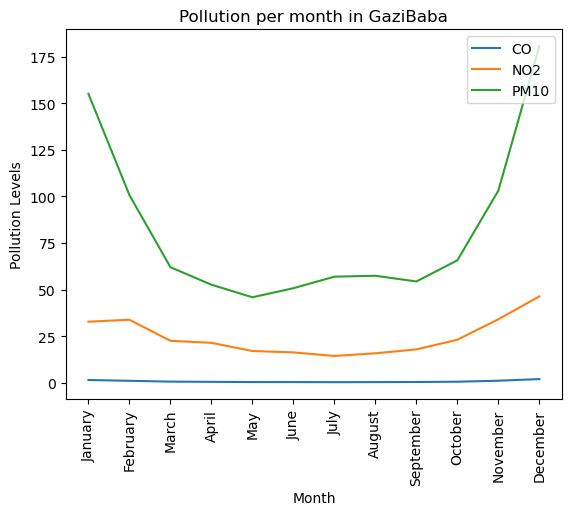





In Karpos the highest CO polltuion on average happens in December with a value of 1.61
In Karpos the highest NO2 polltuion on average happens in December with a value of 40.74
In Karpos the highest O3 polltuion on average happens in July with a value of 72.78
In Karpos the highest PM10 polltuion on average happens in December with a value of 164.75
In Karpos the highest PM25 polltuion on average happens in December with a value of 115.86


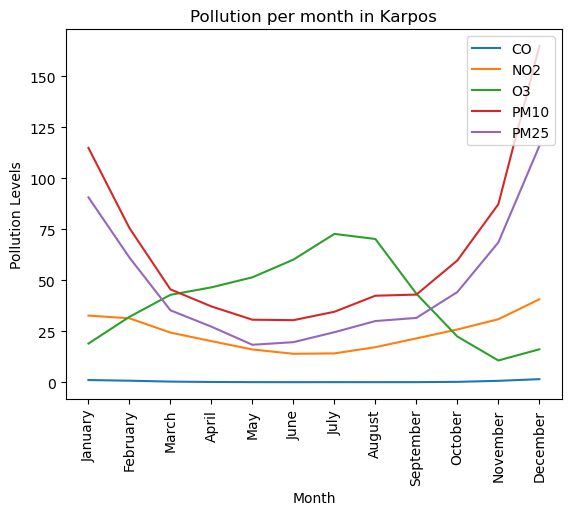





In Lisice the highest CO polltuion on average happens in December with a value of 3.77
In Lisice the highest NO2 polltuion on average happens in January with a value of 34.81
In Lisice the highest O3 polltuion on average happens in July with a value of 53.27
In Lisice the highest PM10 polltuion on average happens in December with a value of 233.88


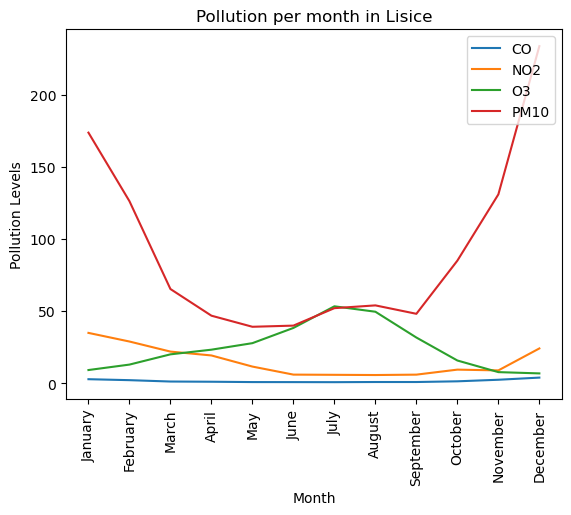





In Miladinovci the highest CO polltuion on average happens in January with a value of 0.89
In Miladinovci the highest NO2 polltuion on average happens in January with a value of 28.49
In Miladinovci the highest O3 polltuion on average happens in July with a value of 70.8
In Miladinovci the highest PM10 polltuion on average happens in January with a value of 82.21


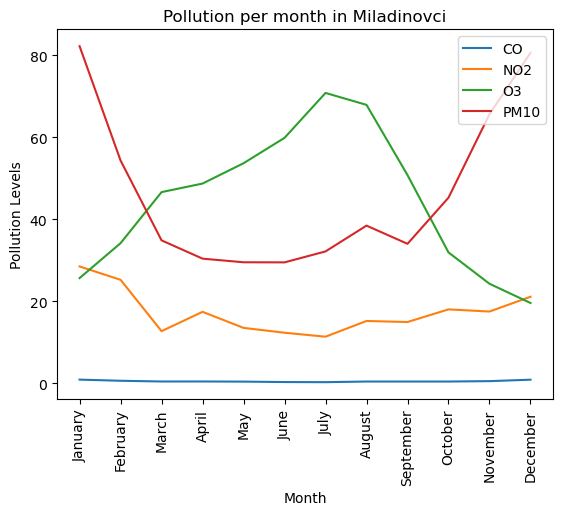





In Rektorat the highest CO polltuion on average happens in January with a value of 7.35
In Rektorat the highest NO2 polltuion on average happens in December with a value of 43.81
In Rektorat the highest O3 polltuion on average happens in August with a value of 49.55
In Rektorat the highest PM10 polltuion on average happens in December with a value of 170.43


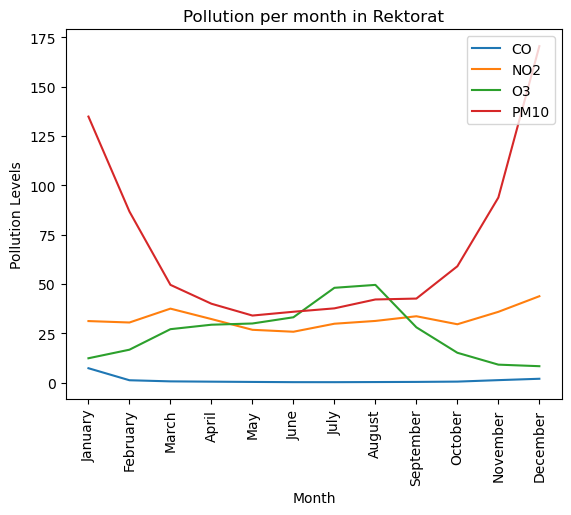

In [13]:
# Solution


# USED IN THE PLOTTING FUNCTION
months_list = [ month for month in df['datetime'].dt.month_name().unique() ]

# USED IN THE LOOPS
location_list = [ loc for loc in df.columns[:6]]
pollutants_list = [ pollutant for pollutant in df['pollutant_type'].unique() ]


for location in location_list:
    for pollutant in pollutants_list:
        q3_df = df[df['pollutant_type'] == pollutant]
        q3_df = q3_df[[location , 'datetime', 'pollutant_type']].groupby(q3_df['datetime'].dt.month).mean()


        printable = q3_df.sort_values(by=location, ascending=False)
        if str(printable.values[0][0]) != 'nan':
            print(f'In {location} the highest {pollutant} polltuion on average happens in {months_list[int(printable.index[0])-1]} with a value of {round(printable.values[0][0],2)}')
        
            data_to_plot = pd.DataFrame()

            data_to_plot['Month'] = np.array(months_list)
            data_to_plot['Pollution Levels'] = q3_df.values
            
            sns.lineplot(data=data_to_plot, x='Month', y='Pollution Levels', label=pollutant)

    plt.title(f'Pollution per month in {location}')
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()
    print("\n\n\n")

# Question 4
What is the average pollution accross locations in every hour during the day?  .......... (2 points)

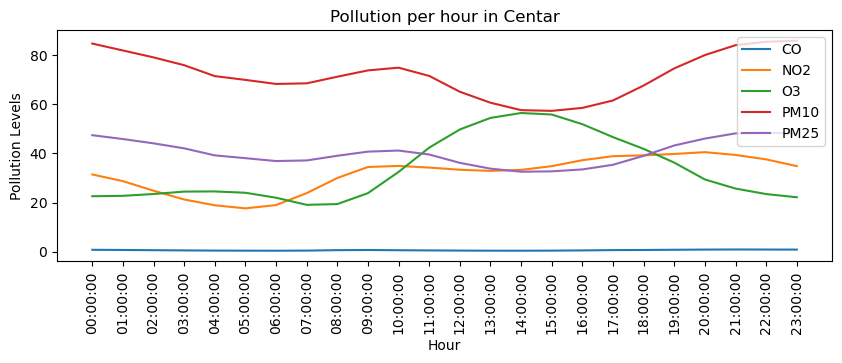

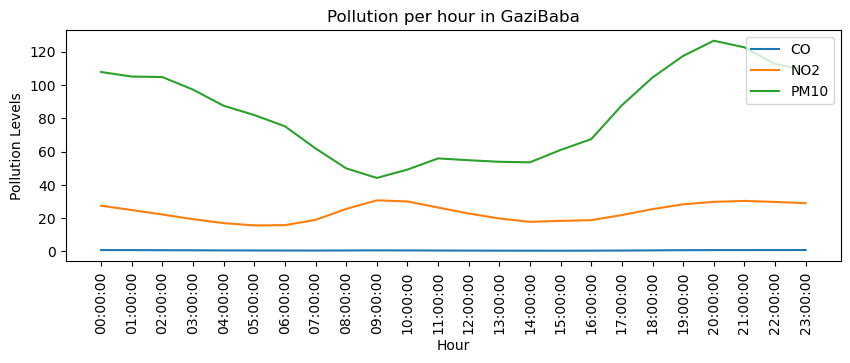

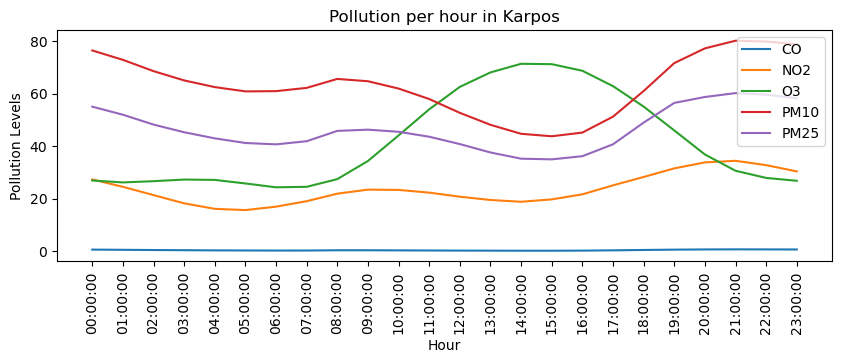

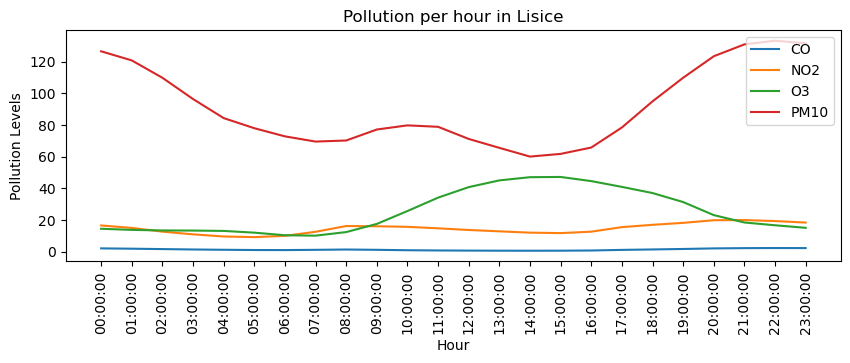

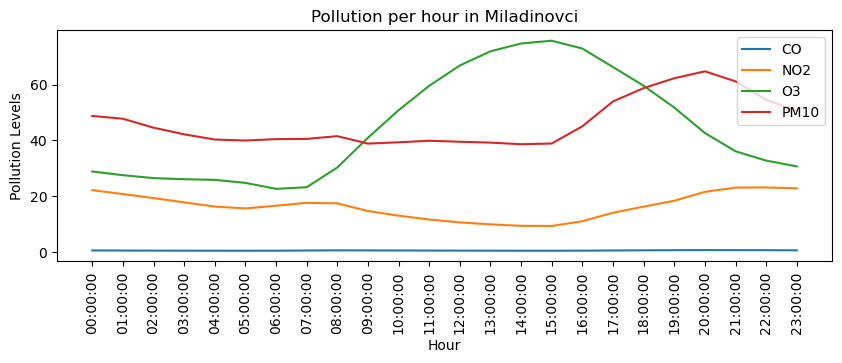

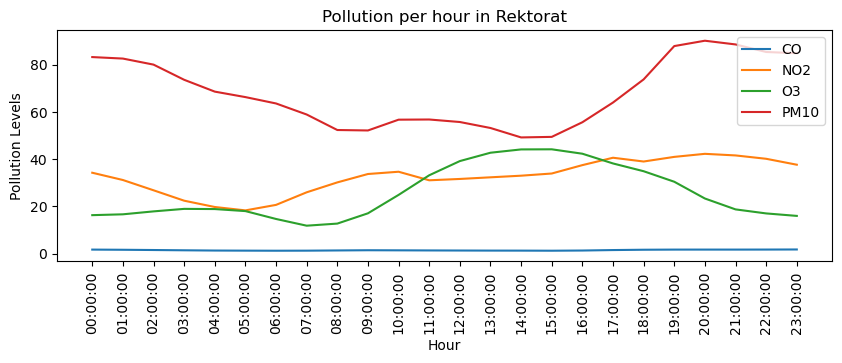

DATA FRAME RESULT:


,index,Hour,Pollution Levels,Pollutant,Location
0,0,00:00:00,0.800600,CO,Centar
1,1,01:00:00,0.727532,CO,Centar
2,2,02:00:00,0.639671,CO,Centar
3,3,03:00:00,0.555861,CO,Centar
4,4,04:00:00,0.480227,CO,Centar
...,...,...,...,...,...
595,19,19:00:00,87.976973,PM10,Rektorat
596,20,20:00:00,90.247184,PM10,Rektorat
597,21,21:00:00,88.671184,PM10,Rektorat
598,22,22:00:00,85.467064,PM10,Rektorat


In [21]:
# Solution

# USED IN THE PLOTTING FUNCTION
hour = [ str(time) for time in df['datetime'].dt.time.unique() ]

# USED IN THE LOOPS
location_list = [ loc for loc in df.columns[:6]]
pollutants_list = [ pollutant for pollutant in df['pollutant_type'].unique() ]

q4_df_final = pd.DataFrame()


for location in location_list:
    plt.figure(figsize=(10, 3))
    for pollutant in pollutants_list:
        q4_df = df[df['pollutant_type'] == pollutant]
        q4_df = q4_df[[location , 'datetime', 'pollutant_type']].groupby(q4_df['datetime'].dt.time).mean()
        
        # AKO BIGGEST VALUE NE E NAN TOGAS NAPRAJ PLOT, ELSE NE PRAVI NISTO
        if str(q4_df.sort_values(by=location, ascending=False).values[0][0]) != 'nan':
            data_to_plot = pd.DataFrame()
            data_to_plot['Hour'] = np.array(hour)
            data_to_plot['Pollution Levels'] = q4_df.values
            data_to_plot['Pollutant'] = pollutant
            data_to_plot['Location'] = location
            
            sns.lineplot(data=data_to_plot, x='Hour', y='Pollution Levels', label=pollutant)
            q4_df_final = pd.concat([q4_df_final, data_to_plot])

    plt.title(f'Pollution per hour in {location}')
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

q4_df_final.reset_index(inplace=True)
print('DATA FRAME RESULT:')
q4_df_final

# Question 5

Calculate and display the average daily pollution accross locations on separate plots for each of the pollutants over time. .......... (3 points)@

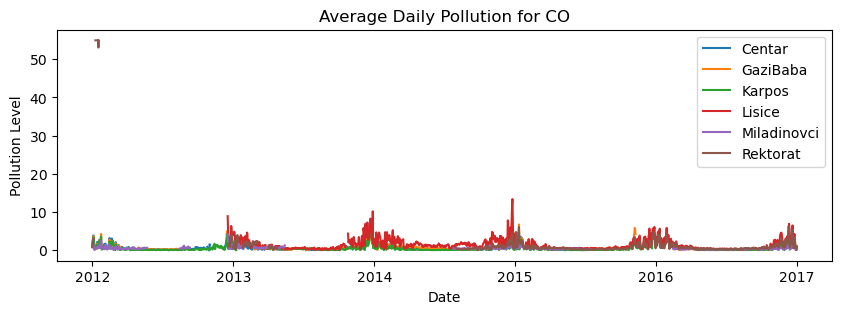

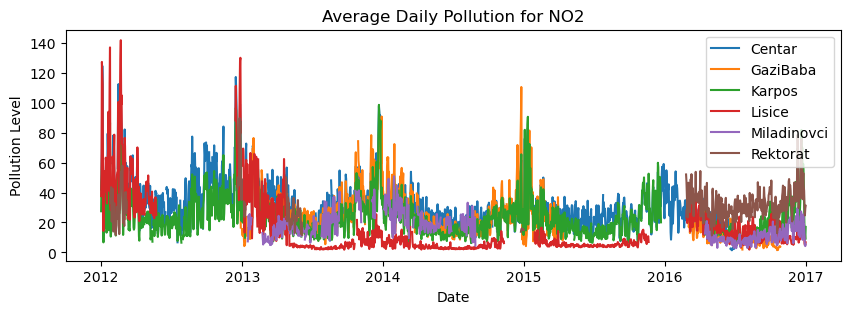

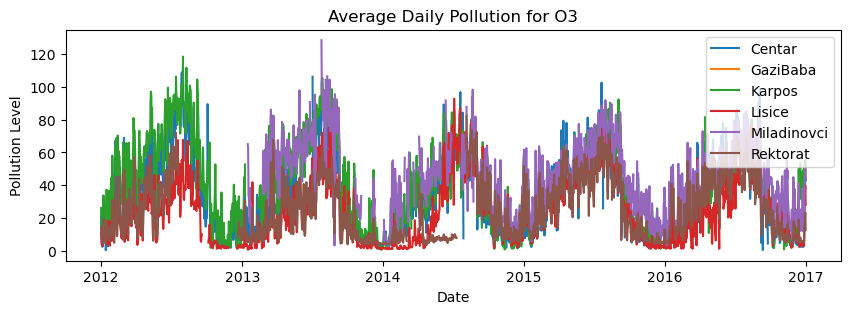

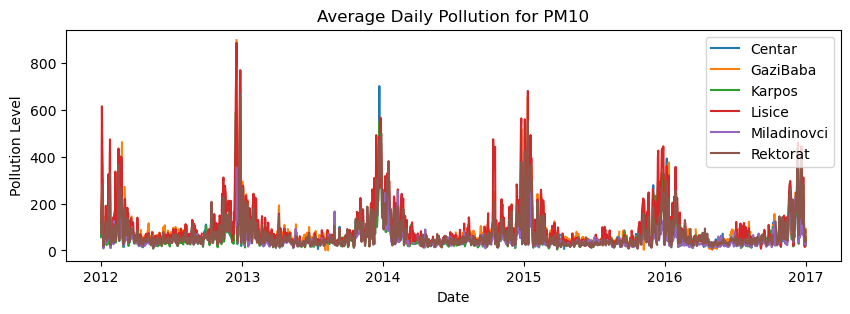

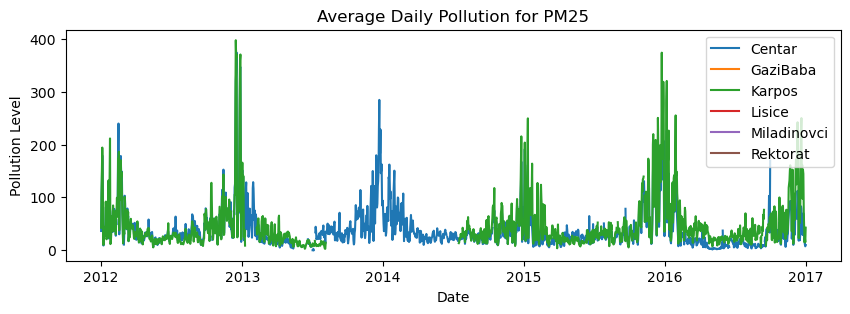

In [22]:
# Solution

average_pollution = df.groupby(['date', 'pollutant_type']).mean().reset_index()
pollutants = df['pollutant_type'].unique()
location_list = [ loc for loc in df.columns[:6]]

for pollutant in pollutants:
    plt.figure(figsize=(10, 3))
    for location in location_list:
        pollutant_data = df[df['pollutant_type'] == pollutant][['date', location]]
        pollutant_data = pollutant_data.groupby('date').mean().reset_index()
        plt.plot(pollutant_data['date'], pollutant_data[location], label=location)

    plt.title(f'Average Daily Pollution for {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Pollution Level')
    plt.legend(loc='upper right')
    plt.show()


## Questions 6
If the range of values for PM10 considered safe and unsafe is according to the following scale:

Good                                    0-50

Moderate 	                            51-154

Unhealthy for sensitive individuals 	155-254

Unhealthy 	                            255-354

Very unhealthy                          355-424

Hazardous                               425-504

On how many days in each year, was the average value of PM10 meauserd accross locations worse than moderate?  .......... (3 points)

In 2012 there were 31 days where the average PM10 measured in Centar was worse than moderate.
In 2013 there were 33 days where the average PM10 measured in Centar was worse than moderate.
In 2014 there were 21 days where the average PM10 measured in Centar was worse than moderate.
In 2015 there were 40 days where the average PM10 measured in Centar was worse than moderate.
In 2016 there were 26 days where the average PM10 measured in Centar was worse than moderate.


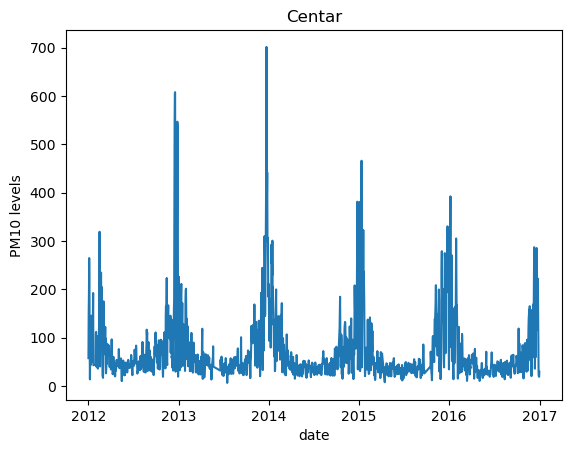






In 2012 there were 29 days where the average PM10 measured in GaziBaba was worse than moderate.
In 2013 there were 14 days where the average PM10 measured in GaziBaba was worse than moderate.
In 2014 there were 17 days where the average PM10 measured in GaziBaba was worse than moderate.
In 2015 there were 44 days where the average PM10 measured in GaziBaba was worse than moderate.
In 2016 there were 38 days where the average PM10 measured in GaziBaba was worse than moderate.


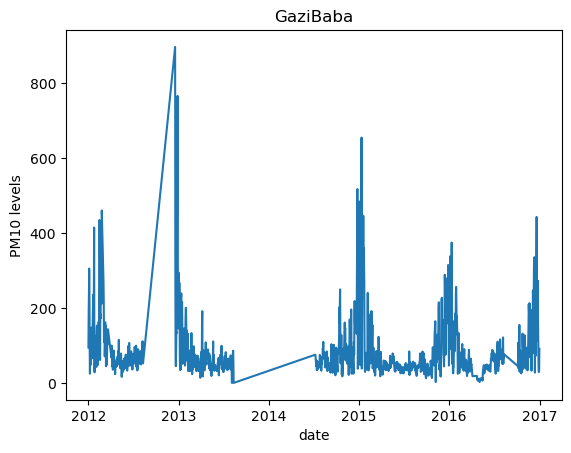






In 2012 there were 25 days where the average PM10 measured in Karpos was worse than moderate.
In 2013 there were 24 days where the average PM10 measured in Karpos was worse than moderate.
In 2014 there were 21 days where the average PM10 measured in Karpos was worse than moderate.
In 2015 there were 28 days where the average PM10 measured in Karpos was worse than moderate.
In 2016 there were 27 days where the average PM10 measured in Karpos was worse than moderate.


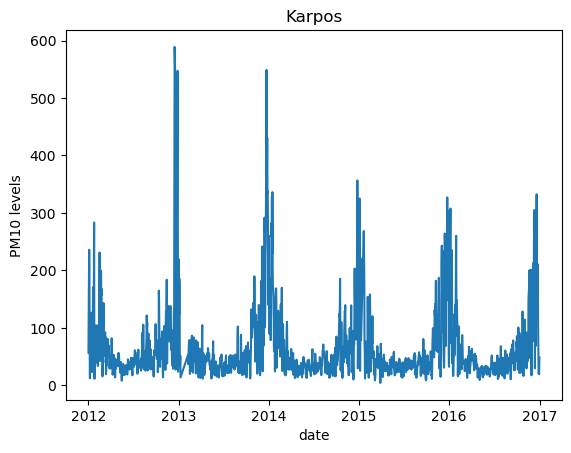






In 2012 there were 63 days where the average PM10 measured in Lisice was worse than moderate.
In 2013 there were 55 days where the average PM10 measured in Lisice was worse than moderate.
In 2014 there were 52 days where the average PM10 measured in Lisice was worse than moderate.
In 2015 there were 61 days where the average PM10 measured in Lisice was worse than moderate.
In 2016 there were 51 days where the average PM10 measured in Lisice was worse than moderate.


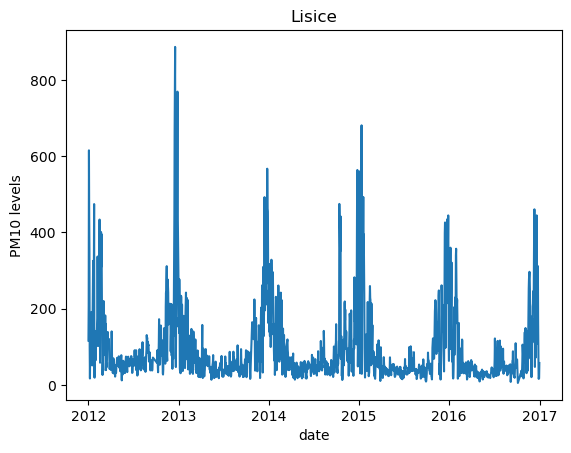






In 2012 there were 8 days where the average PM10 measured in Miladinovci was worse than moderate.
In 2013 there were 4 days where the average PM10 measured in Miladinovci was worse than moderate.
In 2014 there were 9 days where the average PM10 measured in Miladinovci was worse than moderate.
In 2015 there were 6 days where the average PM10 measured in Miladinovci was worse than moderate.
In 2016 there were 4 days where the average PM10 measured in Miladinovci was worse than moderate.


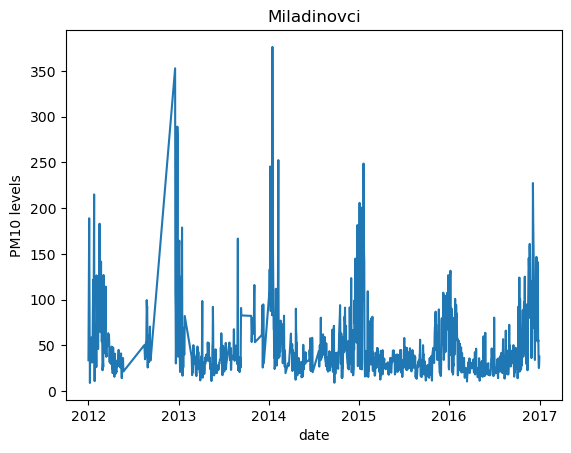






In 2012 there were 29 days where the average PM10 measured in Rektorat was worse than moderate.
In 2013 there were 32 days where the average PM10 measured in Rektorat was worse than moderate.
In 2014 there were 28 days where the average PM10 measured in Rektorat was worse than moderate.
In 2015 there were 27 days where the average PM10 measured in Rektorat was worse than moderate.
In 2016 there were 36 days where the average PM10 measured in Rektorat was worse than moderate.


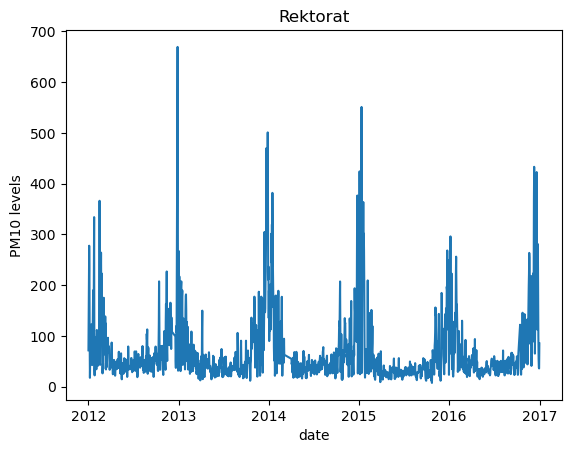

In [8]:
# Solution

location_list = [ loc for loc in df.columns[:6]]

# def calculate_pollution(pollution_levels):
#     if np.isnan(pollution_levels):
#         return np.nan
#     elif pollution_levels >= 0 and pollution_levels <= 50.999999:
#         return 'Good'
#     elif pollution_levels >= 51 and pollution_levels <= 154.999999:
#         return 'Moderate'
#     elif pollution_levels >= 155 and pollution_levels <= 254.999999:
#         return 'Unhealthy for sensitive individuals'
#     elif pollution_levels >= 255 and pollution_levels <= 354.999999:
#         return 'Unhealthy'
#     elif pollution_levels >= 355 and pollution_levels <= 424.999999:
#         return 'Very unhealthy'
#     elif pollution_levels >= 425: # and pollution_levels <= 504:
#         return 'Hazardous'


for location in location_list:
    pm10_df = df[df['pollutant_type'] == 'PM10'].groupby('date').mean().reset_index()
    pm10_df = pm10_df[['date', location]]
    #pm10_df['pollution_levels'] = pm10_df[location].apply(lambda x: calculate_pollution(x))
    pm10_df['date'] = pd.to_datetime(pm10_df['date'])
    for year in pm10_df['date'].dt.year.unique():
        num_of_days = pm10_df[(pm10_df[location] > 155) & (pm10_df['date'].dt.year == year)].count()[0]
        print(f'In {year} there were {num_of_days} days where the average PM10 measured in {location} was worse than moderate.')
    sns.lineplot(data=pm10_df, y=location, x='date')
    plt.ylabel(f'PM10 levels')
    plt.title(location)
    plt.show()
    print("\n\n\n\n")

# Odgovorite se dadeni so print statement, grafikot e samo vuzelizacija za P10 levels.

## Question 7
On how many days in each year, was the value of PM10 measured on at least one location worse than moderate? .......... (3 points)

In [23]:
# Solution



# Direktno gi grupiram po date i gi zimam max so cel da ne zimam nepotrebni informacii, max se dovolno za da mi odredad dali vo toj den bilo worse whan moderate
q7_df = df[df['pollutant_type'] == 'PM10'].groupby('date').max()

# pravam nova kolona koja ke bide True samo ako onkoja od lokaciite ima pogolema vrednost od 154 ( worse than moderate )
q7_df['Worse'] = np.where((q7_df['Centar'] > 154 ) | (q7_df['GaziBaba'] > 154 ) | (q7_df['Karpos'] > 154 ) |
                          (q7_df['Lisice'] > 154 ) | (q7_df['Miladinovci'] > 154 ) | (q7_df['Rektorat'] > 154 ), True, False)

# gi zimam samo tie denovi kade sto e worse than moderate
q7_df = q7_df[q7_df['Worse'] == True]

years = [ year for year in q7_df['datetime'].dt.year.unique() ]
worse_days = list()

for year in years:
    worse_days.append(q7_df[q7_df['datetime'].dt.year == year].count()['Worse'])
    print(f'There are {worse_days[-1]} days in {year} where the PM10 levels were worse than moderate.')


There are 243 days in 2012 where the PM10 levels were worse than moderate.
There are 208 days in 2013 where the PM10 levels were worse than moderate.
There are 241 days in 2014 where the PM10 levels were worse than moderate.
There are 190 days in 2015 where the PM10 levels were worse than moderate.
There are 233 days in 2016 where the PM10 levels were worse than moderate.


## Question 8
Make a bar plot showing the number of days per year when the measured value for PM10 was worse than moderate on at least one location.  .......... (3 points)

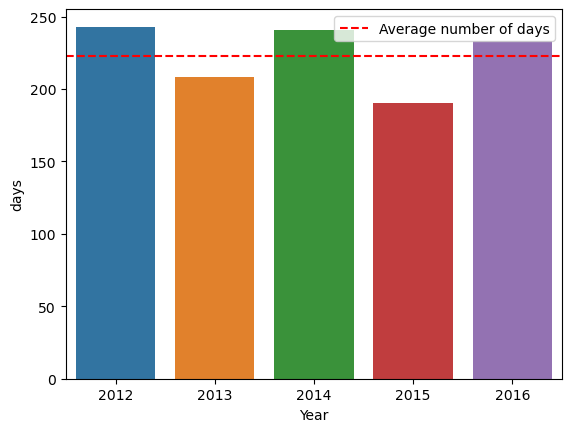

In [37]:
toPlot_df = pd.DataFrame()

np_array_worse = np.array(worse_days)
np_array_worse_mean = np_array_worse.mean()

toPlot_df['Year'] = years
toPlot_df['days'] = worse_days

# q7_df_avg = q7_df

sns.barplot(data=toPlot_df, y='days', x='Year')
plt.axhline(y=np_array_worse_mean, color='red', linestyle='--', label='Average number of days')
plt.legend()
plt.show()

